"Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 
Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска."

Цель данной работы - произвести разведовательный анализ предоставленых данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_columns', 50) # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')
display(stud_math.head(10))
stud_math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [2]:
# В датасете 30 столбцов, в задании дано описание для 29. Аномалия. "Лишний" столбец - studytime, granular.
# В таблице видим возможную взаимосвязь между ним и столбцом studytime.
# Проверим корреляцию

In [3]:
stud_math['studytime, granular'].corr(stud_math['studytime'])

-0.9999999999999991

In [4]:
# Данные корреляции позволяют со спокойной совестью прибить один столбец.
# Похоже, он добавлен для введения в заблуждение потенциального противника.

In [5]:
stud_math.drop(['studytime, granular'], inplace = True, axis = 1)

# Первичные анализ и обработка данных

1. Столбец "school" — аббревиатура школы, в которой учится ученик

In [6]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [7]:
stud_math.loc[:, ['school']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [8]:
# Школ всего две. Пустых значений нет. Основная масса данных в датасете об учениках школы GP.

2. Столбец "sex" — пол ученика ('F' - женский, 'M' - мужской)

In [9]:
pd.DataFrame(stud_math.sex.value_counts())

,sex
F,208
M,187


In [10]:
stud_math.loc[:, ['sex']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [11]:
# Полов (внезапно!) тоже только два. Пустые значения в столбце так же отсуствуют.

3. Столбец "age" — возраст ученика (от 15 до 22)

In [12]:
pd.DataFrame(stud_math.age.value_counts())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


In [13]:
stud_math.loc[:, ['age']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [14]:
# Возраст учеников находится в диапазоне от 16 до 22 лет. Пустых значений нет. Построим гистограмму распределения.
# При bins по умолчанию получается провал на графике, хотя в данных провала нет. Поэтому bins, для красоты, выставим 8.

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

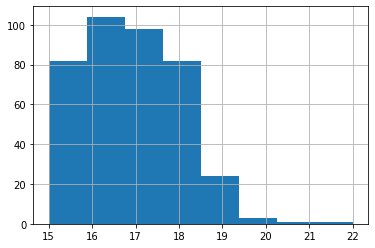

In [15]:
stud_math.age.hist(bins = 8)
stud_math.age.describe()

In [16]:
# Имеем положительное распределение. Есть подозрения, что крайне правые значения могут быть выбросами. 
# Построим боксплот.

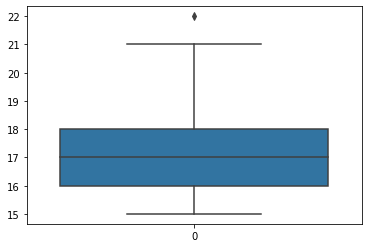

In [17]:
sns.boxplot(data=stud_math.age)

In [18]:
# Так и есть. Значение 22 япляется выбросом. Такой второгодник-переросток один, думаю, есть смысл его исключить.

In [19]:
stud_math = stud_math.loc[stud_math.age < 22]

4. Столбец "address" — тип адреса ученика ('U' - городской, 'R' - за городом)

In [20]:
pd.DataFrame(stud_math.address.value_counts())

,address
U,294
R,83


In [21]:
stud_math.loc[:, ['address']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [22]:
# Есть 17 пустых значений. Чем их можно заполнить, пока непонятно.

5. Столбец "famsize" — размер семьи('LE3' <= 3, 'GT3' >3)

In [23]:
pd.DataFrame(stud_math.famsize.value_counts())

,famsize
GT3,260
LE3,107


In [24]:
stud_math.loc[:, ['famsize']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  367 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [25]:
# Есть 28 пустых значений. Чем их можно заполнить, пока непонятно.

6. Столбец "Pstatus"  — статус совместного проживания родителей ('T' - живут вместе 'A' - раздельно)

In [26]:
pd.DataFrame(stud_math.Pstatus.value_counts())

,Pstatus
T,313
A,36


In [27]:
stud_math.loc[:, ['Pstatus']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  349 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [28]:
# Есть 46 пустых значений, что как-то многовато, наверно. Чем их можно заполнить, пока непонятно.

7. Столбец "Medu" — образование матери и столбец "Fedu" — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [29]:
pd.DataFrame(stud_math.Medu.value_counts())

,Medu
4.0,131
2.0,102
3.0,96
1.0,59
0.0,3


In [30]:
stud_math.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    391 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


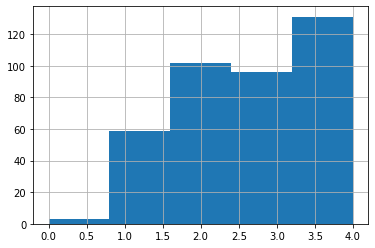

In [31]:
stud_math.Medu.hist(bins = 5)

In [32]:
# Аномалий не обнаружено, но есть 4 пустых значения.

In [33]:
pd.DataFrame(stud_math.Fedu.value_counts())

,Fedu
2.0,106
3.0,96
4.0,88
1.0,77
0.0,2
40.0,1


In [34]:
# Есть выбивающееся значение "40.0", не соответствущее описанию столбца. Видимо, опечатка. Заменим на "4.0".

In [35]:
stud_math.loc[stud_math['Fedu'] == 40.0, 'Fedu'] = 4

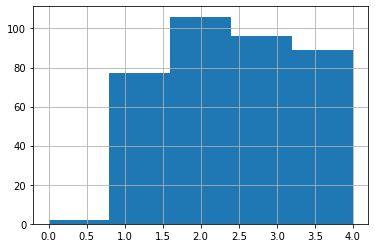

In [36]:
stud_math.Fedu.hist(bins = 5)

In [37]:
stud_math.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [38]:
# Присуствует 25 пустых значений. 
# Есть мнение, что люди выбирают себе пару сходного интеллектуального уровня, проверим это.

In [39]:
stud_math['Medu'].corr(stud_math['Fedu'])

0.6281655874860508

In [40]:
# Досточно высокий уровень корреляции. 
# Думаю можно заменить пустые значения в столбцах образования родителей на аналогичные у супруга.

In [41]:
stud_math.loc[stud_math.Medu.isnull(), 'Medu'] = stud_math.Fedu

In [42]:
stud_math.loc[stud_math.Fedu.isnull(), 'Fedu'] = stud_math.Medu

In [43]:
# Не осталось ли пустых хначений?
stud_math.loc[:, ['Medu']].info()
stud_math.loc[:, ['Fedu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    394 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [44]:
# А нет - все хорошо.

8. Столбцы Mjob — работа матери и Fjob - работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [45]:
pd.DataFrame(stud_math.Mjob.value_counts())

,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


In [46]:
stud_math.loc[:, ['Mjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    375 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [47]:
# Есть 19 пустых значений.

In [48]:
pd.DataFrame(stud_math.Fjob.value_counts())

,Fjob
other,197
services,101
teacher,29
at_home,16
health,15


In [49]:
stud_math.loc[:, ['Fjob']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    358 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [50]:
# Есть 36 пустых значений. 

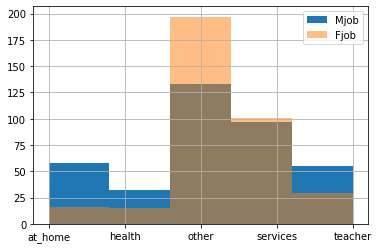

In [51]:
stud_math.Mjob.hist(bins = 5, label = 'Mjob')
stud_math.Fjob.hist(alpha = 0.5, bins = 5, label = 'Fjob')
plt.legend()

In [52]:
# Думаю можно заменить пустые значения на нейтральное "other", 
# благо оно преобладает в обоих столбцах, а пустых не так много.

In [53]:
stud_math.loc[stud_math.Mjob.isnull(), 'Mjob'] = 'other'

In [54]:
stud_math.loc[stud_math.Fjob.isnull(), 'Fjob'] = 'other'

9. Столбец "reason" — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [55]:
pd.DataFrame(stud_math.reason.value_counts())

,reason
course,137
home,104
reputation,103
other,33


In [56]:
stud_math.loc[:, ['reason']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  377 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [57]:
# Есть 17 пустых значений. 4 уникальных. Чем заполнять пустые - непонятно.

10. Столбец "guardian" — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [58]:
pd.DataFrame(stud_math.guardian.value_counts())

,guardian
mother,249
father,86
other,28


In [59]:
stud_math.loc[:, ['guardian']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  363 non-null    object
dtypes: object(1)
memory usage: 16.2+ KB


In [60]:
# 3 уникальных щначения. 31 пустое. Чем их можно заполнить, пока непонятно.

11. Столбец "traveltime" — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [61]:
pd.DataFrame(stud_math.traveltime.value_counts())

,traveltime
1.0,241
2.0,96
3.0,22
4.0,7


In [62]:
stud_math.loc[:, ['traveltime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 16.2 KB


In [63]:
# 4 уникальных щначения. 28 пустое. Можно заполнить типичным значением 1.0, а 4.0 - видимо, будет выбросом.

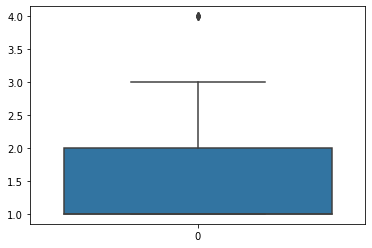

In [64]:
sns.boxplot(data=stud_math.traveltime)

In [65]:
# ЧТД

In [66]:
stud_math.loc[stud_math.traveltime.isnull(), 'traveltime'] = 1.0
stud_math = stud_math.loc[stud_math.traveltime < 4.0]

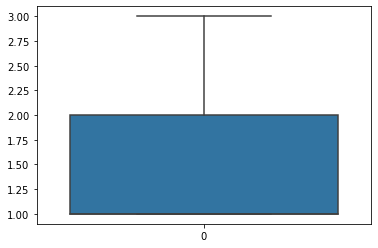

In [67]:
sns.boxplot(data=stud_math.traveltime)

12. Столбец "studytime" — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

In [68]:
pd.DataFrame(stud_math.studytime.value_counts())

,studytime
2.0,192
1.0,99
3.0,63
4.0,26


In [69]:
stud_math.loc[:, ['studytime']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  380 non-null    float64
dtypes: float64(1)
memory usage: 16.0 KB


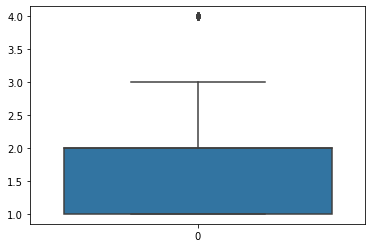

In [70]:
sns.boxplot(data=stud_math.studytime)

In [71]:
# 4 уникальных значения. 7 пустых. Пустые можно заменить на типичное 2.0. 
# 4.0 будет выбросом, но мне кадется его нужно оставить, т.к. вариантов значений мало, 
# а связь с результом кажется очевидной.

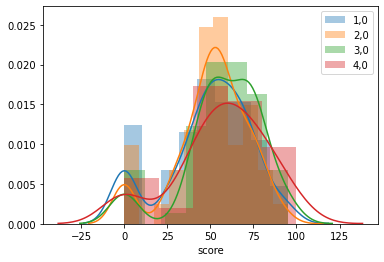

In [72]:
stud_math.loc[stud_math.traveltime.isnull(), 'studytime'] = 1.0

sns.distplot(stud_math[stud_math.studytime == 1.0].score, label='1,0')
sns.distplot(stud_math[stud_math.studytime == 2.0].score, label='2,0')
sns.distplot(stud_math[stud_math.studytime == 3.0].score, label='3,0')
sns.distplot(stud_math[stud_math.studytime == 4.0].score, label='4,0')
plt.legend()

In [73]:
# ЧТД. 

13. Столбец "failures" — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [74]:
pd.DataFrame(stud_math.failures.value_counts())

,failures
0.0,289
1.0,49
2.0,16
3.0,12


In [75]:
stud_math.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  366 non-null    float64
dtypes: float64(1)
memory usage: 16.0 KB


In [76]:
# 4 уникальных значения. 20 пустых. Так как явный перекос в сторону 0.0, забиваем пустые нулями.

In [77]:
stud_math.loc[stud_math.traveltime.isnull(), 'failures'] = 0.0

14. Столбцы "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic".
    schoolsup — дополнительная образовательная поддержка (yes или no);
    famsup — семейная образовательная поддержка (yes или no);
    paid — дополнительные платные занятия по математике (yes или no);
    activities — дополнительные внеучебные занятия (yes или no);
    nursery — посещал детский сад (yes или no);
    higher — хочет получить высшее образование (yes или no);
    internet — наличие интернета дома (yes или no);
    romantic — в романтических отношениях (yes или no);

In [78]:
# Далее идет группа столбцов вида "Yes\No". Попробуем посмотреть на них всех скопом.

In [79]:
value_list = []
bin_columns_list = ['schoolsup', 'famsup', 'paid', 'activities', 
                   'nursery', 'higher', 'internet', 'romantic']
for x in bin_columns_list:
    value_list.append(pd.DataFrame(stud_math[x].value_counts()))
    value_list.append(['empty', stud_math[x].isnull().sum()])
value_list

[     schoolsup
 no         329
 yes         49,
 ['empty', 9],
      famsup
 yes     217
 no      134,
 ['empty', 36],
      paid
 no    195
 yes   153,
 ['empty', 39],
      activities
 yes         191
 no          182,
 ['empty', 14],
      nursery
 yes      294
 no        77,
 ['empty', 16],
      higher
 yes     351
 no       17,
 ['empty', 19],
      internet
 yes       298
 no         55,
 ['empty', 34],
      romantic
 no        237
 yes       119,
 ['empty', 31]]

In [80]:
# Как и ожидалось, в каждом столбце по два уникальных значения. Во всех столбцах есть пустые ячейки. 
# Для "schoolsup", "higher", "internet" и, наверно, "nursery" пустые можно заменить на типичные. 
# Что делать с остальными, пока неясно.

In [81]:
stud_math.loc[stud_math.traveltime.isnull(), 'schoolsup'] = 'no'
stud_math.loc[stud_math.traveltime.isnull(), 'nursery'] = 'yes'
stud_math.loc[stud_math.traveltime.isnull(), 'higher'] = 'yes'
stud_math.loc[stud_math.traveltime.isnull(), 'internet'] = 'yes'   

15. Столбцы "famrel" — семейные отношения (от 1 - очень плохо до 5 - очень хорошо), "freetime" — свободное время после школы (от 1 - очень мало до 5 - очень мого), "goout" — проведение времени с друзьями (от 1 - очень мало до 5 - очень много), "health" — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо).

In [82]:
# Аналогично просмотрим следующую группу столбцов.

In [83]:
value_list2 = []
pent_columns_list = ['famrel', 'freetime', 'goout', 'health']
for x in pent_columns_list:
    value_list2.append(pd.DataFrame(stud_math[x].value_counts()))
    value_list2.append(['empty', stud_math[x].isnull().sum()])
value_list2

[      famrel
  4.0     178
  5.0      96
  3.0      62
  2.0      17
  1.0       6
 -1.0       1,
 ['empty', 27],
      freetime
 3.0       149
 4.0       110
 2.0        63
 5.0        36
 1.0        18,
 ['empty', 11],
      goout
 3.0    127
 2.0     99
 4.0     84
 5.0     46
 1.0     23,
 ['empty', 8],
      health
 5.0     136
 3.0      88
 4.0      61
 1.0      45
 2.0      43,
 ['empty', 14]]

In [84]:
# В столбце "famrel" аномалия со значением "-1". Вероятно, опечатка. Исправим.

In [85]:
stud_math.loc[stud_math['famrel'] == (-1), 'famrel'] = 1

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'health')

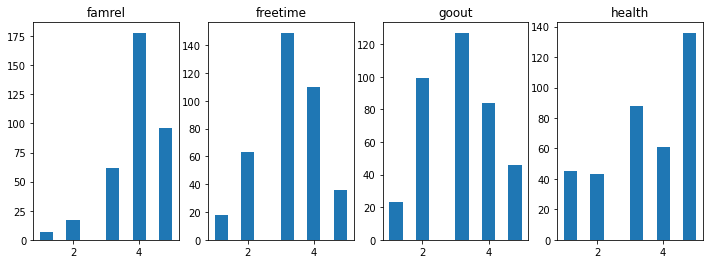

In [86]:
fig, axes =  plt.subplots(1, 4, figsize=(12,4))
axes[0].hist(stud_math['famrel'])
axes[0].set_title('famrel')

axes[1].hist(stud_math['freetime'])
axes[1].set_title('freetime')

axes[2].hist(stud_math['goout'])
axes[2].set_title('goout')

axes[3].hist(stud_math['health'])
axes[3].set_title('health')

In [87]:
# В столбцах есть пустые значения. Чем их заменить, пока не понятно.

16. Столбец "absences" — количество пропущенных занятий.

count    375.00000
mean       7.29600
std       23.70023
min        0.00000
25%        0.00000
50%        4.00000
75%        8.00000
max      385.00000
Name: absences, dtype: float64

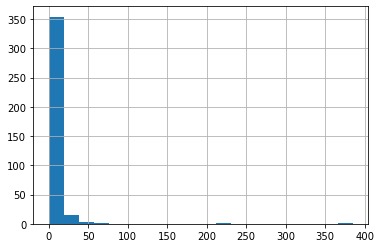

In [88]:
stud_math.absences.hist(bins = 20)
stud_math.absences.describe()

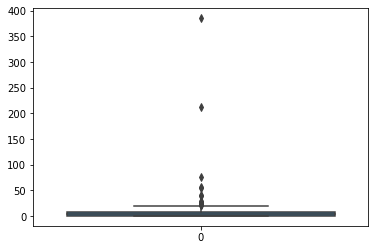

In [89]:
sns.boxplot(data=stud_math.absences)

In [90]:
stud_math = stud_math.loc[stud_math.absences <= 15]

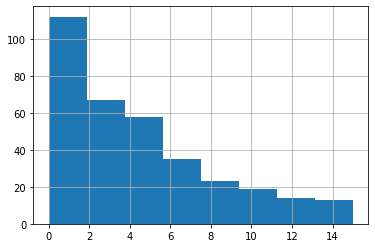

In [91]:
stud_math.absences.hist(bins = 8)

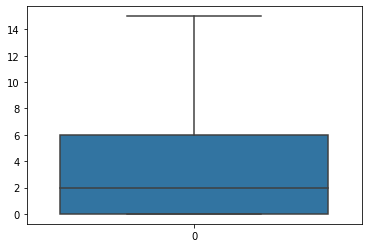

In [92]:
sns.boxplot(data=stud_math.absences)

In [93]:
stud_math.absences.value_counts()

0.0     109
2.0      59
4.0      53
6.0      29
8.0      20
10.0     17
12.0     12
14.0     11
3.0       8
7.0       6
5.0       5
9.0       3
1.0       3
11.0      2
15.0      2
13.0      2
Name: absences, dtype: int64

In [94]:
stud_math.loc[:, ['absences']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  341 non-null    float64
dtypes: float64(1)
memory usage: 15.3 KB


In [95]:
# Убраны выбросы. Пустые значения тоже ушли в процессе.

16. Столбец "score" — баллы по госэкзамену по математике.

count    336.000000
mean      52.187500
std       23.526244
min        0.000000
25%       43.750000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

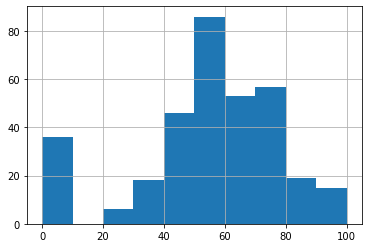

In [96]:
stud_math.score.hist()
stud_math.score.describe()

In [97]:
stud_math.score.value_counts()

50.0     47
55.0     39
0.0      36
75.0     30
70.0     27
60.0     27
65.0     26
40.0     24
45.0     22
80.0     16
30.0     12
90.0      9
25.0      6
35.0      6
95.0      5
85.0      3
100.0     1
Name: score, dtype: int64

In [98]:
# У нас явная аномалия - 36 позиций со значением 0.0. 
# Что это - ошибка ввода, человек не пришел на экзамен, человек провалили экзамен?
# Неизвестно. Т.к. к нас еще и существенный пробел до 20.0, думаю, надо от этих данных избавляться.
# А также от 6 пропусков. Все-таки score самый важный столбец.

In [99]:
stud_math.loc[stud_math.score.isnull(), 'score'] = 0.0

In [101]:
stud_math = stud_math.loc[stud_math.score > 0.0]

count    300.000000
mean      58.450000
std       15.901479
min       25.000000
25%       50.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

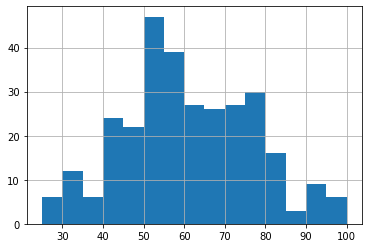

In [108]:
stud_math.score.hist(bins = 15)
stud_math.score.describe()

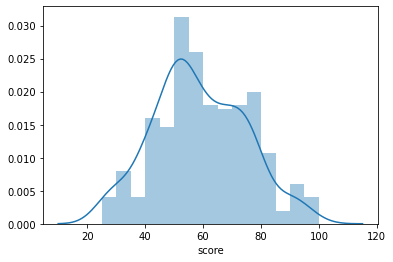

In [109]:
sns.distplot(stud_math.score, bins = 15)

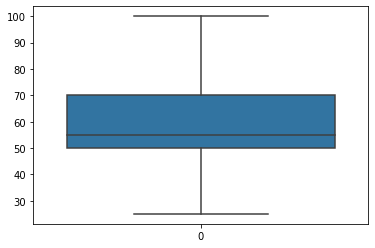

In [110]:
sns.boxplot(data=stud_math.score)

In [111]:
# Избавилимь от выбросов.

# Корреляционный анализ

In [112]:
# Выясним, какие столбцы коррелируют со score.
# Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 
# Корреляции рассмотрим только для числовых столбцов.

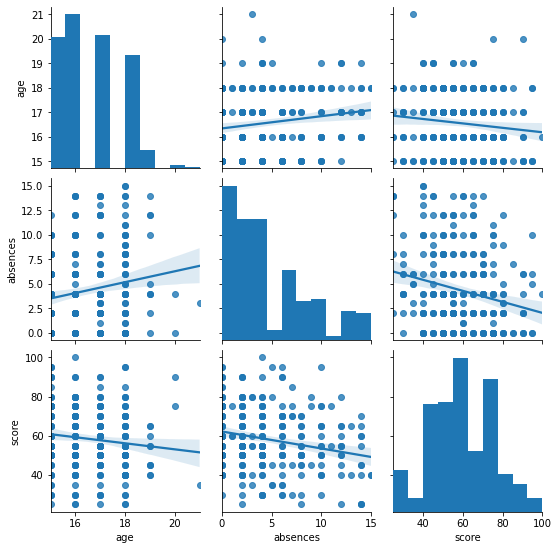

In [116]:
num_col = stud_math[['age', 'absences', 'score']]
sns.pairplot(num_col, kind = 'reg')

In [117]:
# Используем для наглядности матрицу корреляций:

In [118]:
num_col.corr()

,age,absences,score
age,1.000000,0.166309,-0.118079
absences,0.166309,1.000000,-0.220476
score,-0.118079,-0.220476,1.000000


In [119]:
# Есть обратная корреляция между возрастом и баллами по математике, а также между пропущенными занятиями и баллами.
# Чем старше ученик, тем хуже результат. Чем больше он пропускает, тем опять же, меньше балл.

# Анализ номинативных переменных

In [120]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (12, 4))
    sns.boxplot(x=column, y='score', 
                data=stud_math.loc[stud_math.loc[:, column].isin(stud_math.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

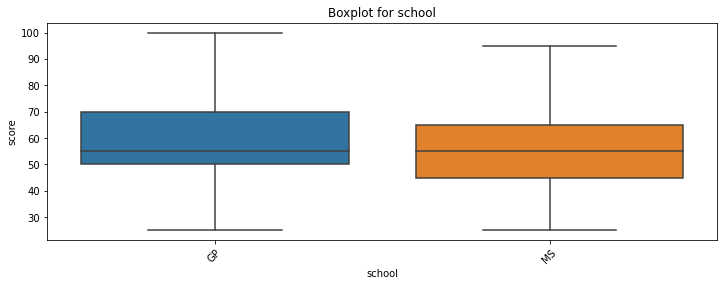

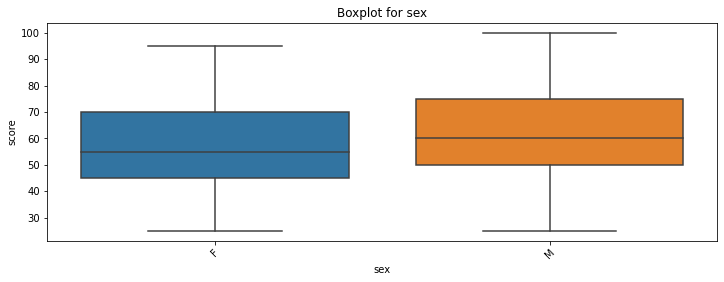

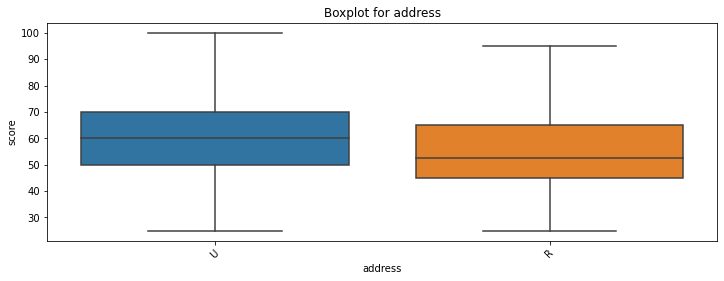

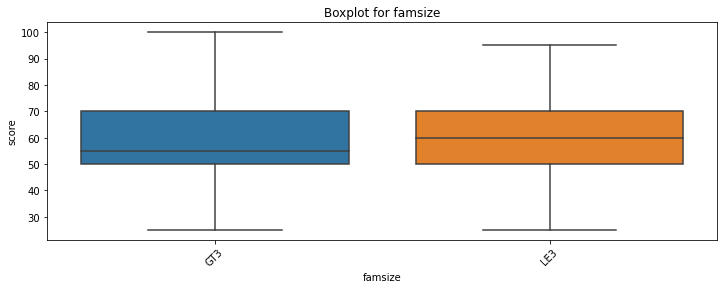

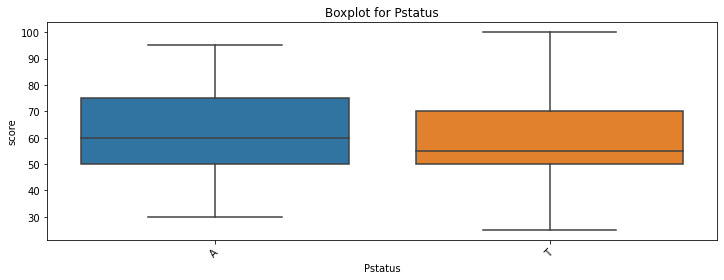

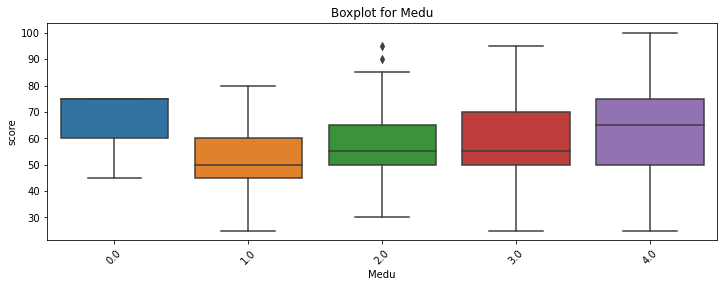

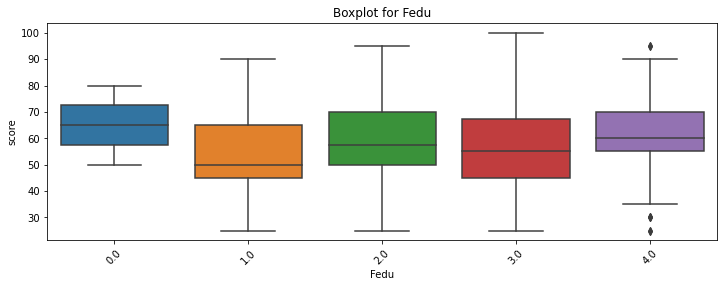

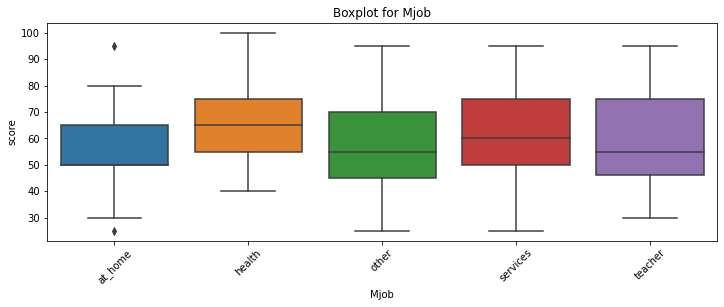

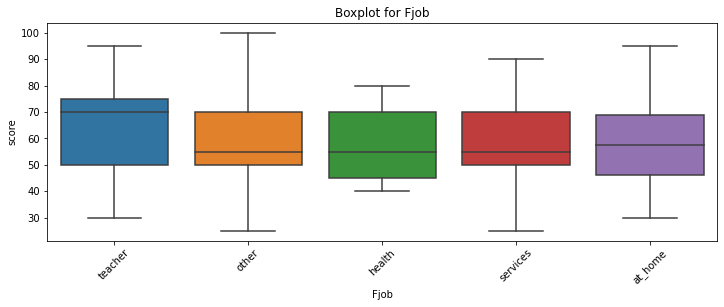

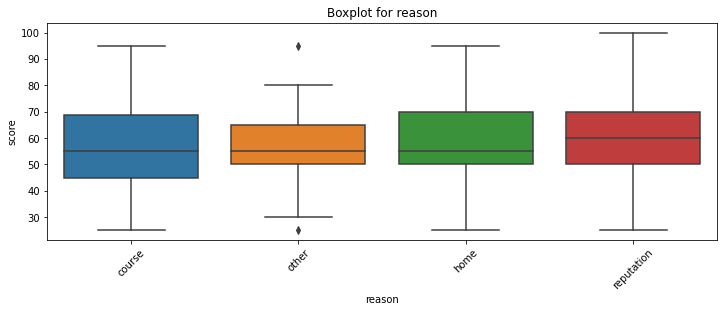

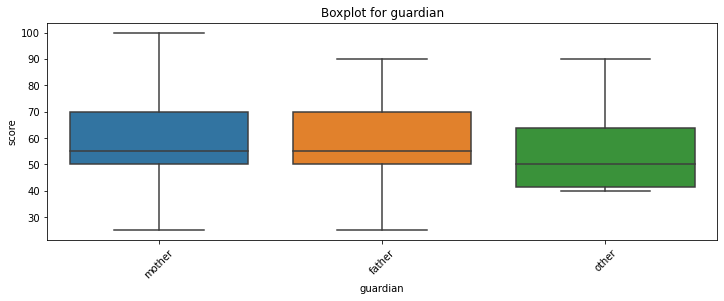

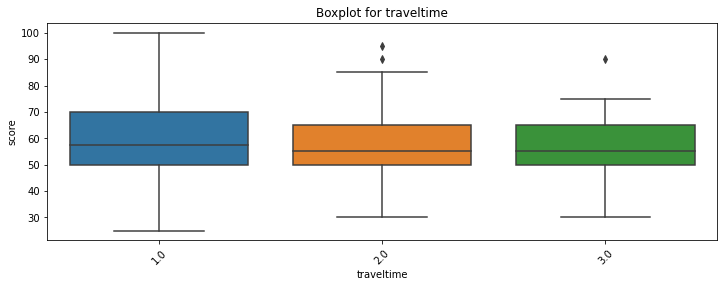

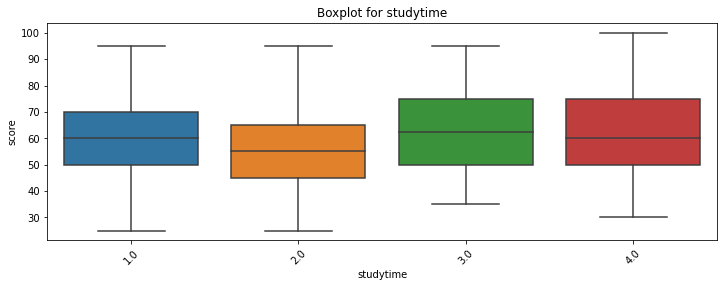

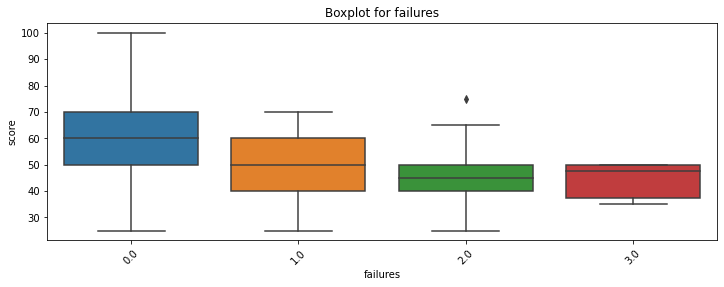

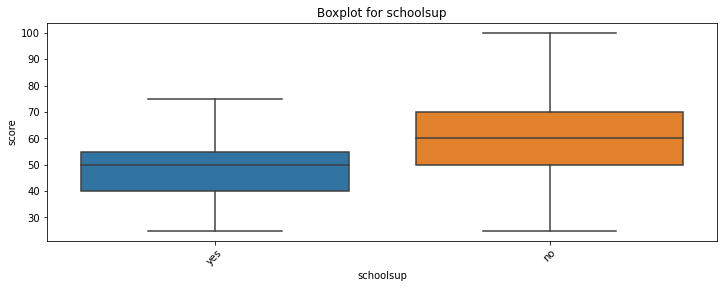

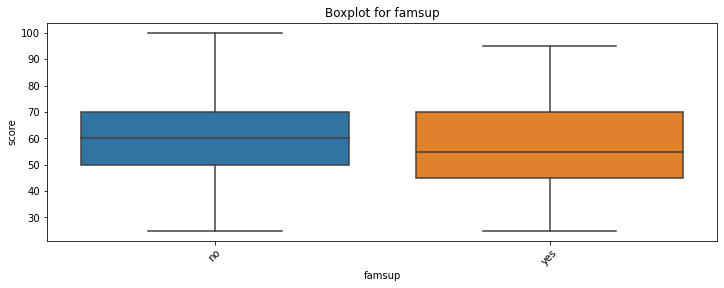

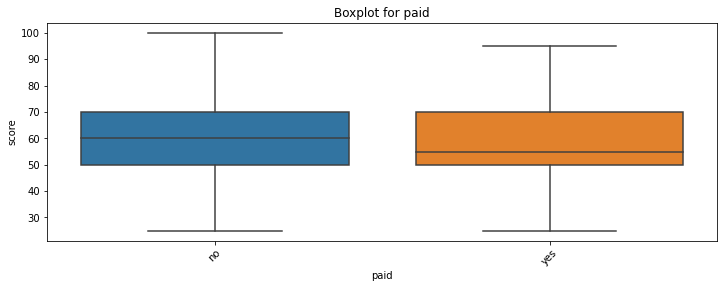

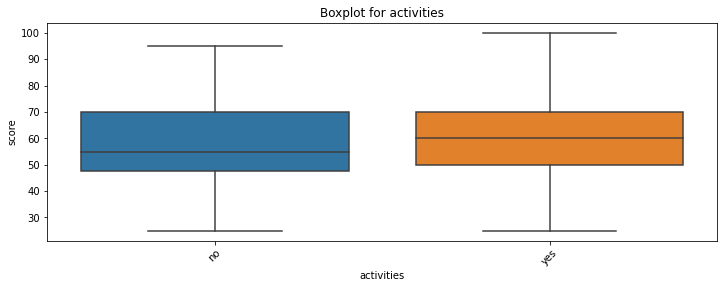

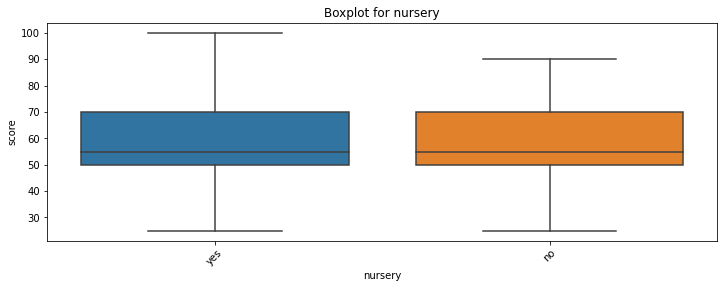

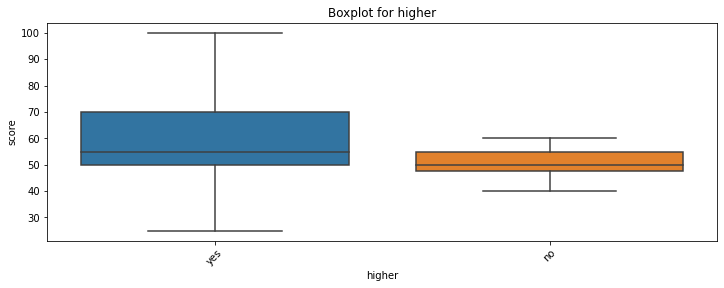

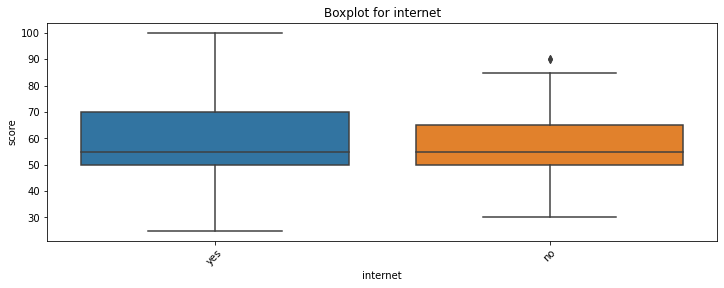

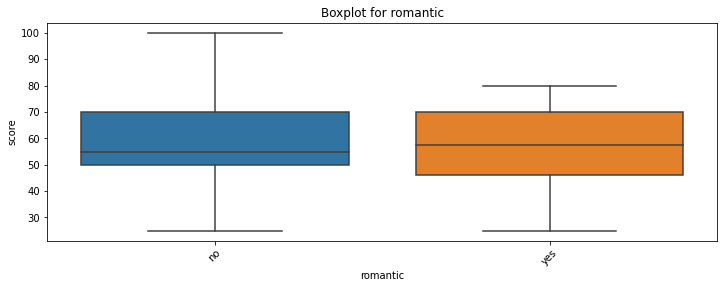

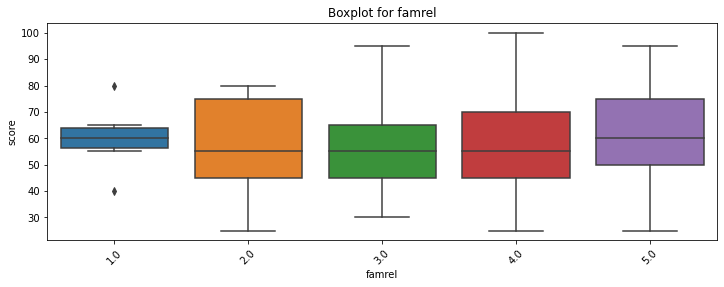

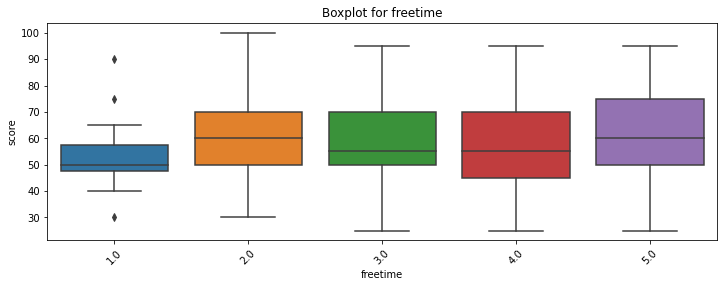

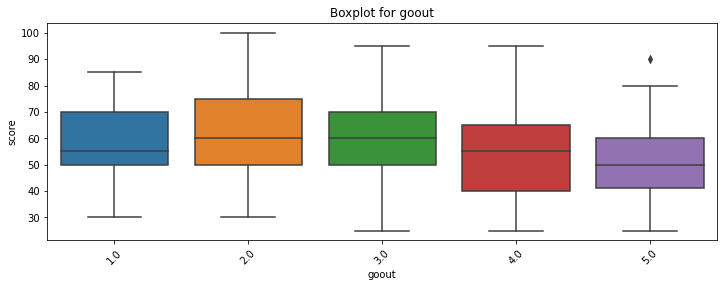

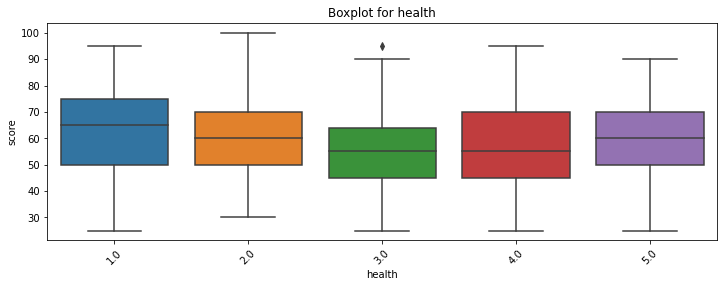

In [122]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [123]:
# Визуально кажется что плотности распределения существенно различаются для следующих распределений:
# Medu, Fedu, Mob, Fob, failures, schoolsup, famrel, freetime, nursery, higher.

In [124]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента.

In [125]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'], 
                        stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [126]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


# Выводы

In [128]:
# Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:
# age, sex, address, Medu, studytime, failres, schoolsup и goout.
# Исходный датасет, к сожалению, сожержит некоторое количество ошибок и большое количество пробелов.